## Import Libraries


In [44]:
import numpy as np
import pandas as pd
import os
import shutil
import time
import h5py
import matplotlib.pyplot as plt
from scipy.special import expit, logit
from subprocess import Popen

## Create New Folder

In [45]:
loc = f'./files/BC_IC_files/Run_{int(time.time())}'
print(loc)


./files/BC_IC_files/Run_1618059531


In [46]:
src = '../../../test_GMS_3/test_trans_MODFLOW'

## Open h5 file to be changed

In [47]:
shutil.copytree(src, loc)

'./files/BC_IC_files/Run_1618059531'

In [48]:
file_name = f'./{loc}/test_trans.h5'

f1 = h5py.File(file_name, 'r+') 

## The field that has to be changed

In [49]:
m = 0
n = 4

level1 = list(f1.keys())
level2 = list(f1[level1[m]].keys())

print(level1[m])
print(level2[n])

Data_Starting_Head = f1[level1[m]][level2[n]]

############################
m = 14
n = 6


level1 = list(f1.keys())
level2 = list(f1[level1[m]].keys())

print(level1[m])
print(level2[n])

Data_Specified_Head = f1[level1[m]][level2[n]]


Arrays
StartHead1
SUB
16. Sfe


In [50]:
############################
m = 0
n = 3


level1 = list(f1.keys())
level2 = list(f1[level1[m]].keys())

print(level1[m])
print(level2[n])

SY1 = f1[level1[m]][level2[n]]

Arrays
SY1


In [51]:
n=1
print(level2[n])
Data_use_last = f1[level1[m]][level2[n]]


HK1


In [52]:
# Data_use_last[:] *0

In [53]:
def print_values(f,key=None):
    
    try:
        print(key)
        print(f[:])
        
    except:
        for key in list(f.keys()):
            print_values(f[key],key)
    
    

In [54]:
print_values(f1)

None
Arrays
HANI1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
HK1
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.]
SS1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

## Export Data

In [55]:

Data_Starting_Head_values = Data_Starting_Head[:]

Data_Specified_Head_values = Data_Specified_Head[:]

In [56]:
Data_Specified_Head_values.shape

(1, 1)

In [57]:
Data_Starting_Head_values.shape

(100,)

In [58]:
N_x = 10
N_t = 3

In [59]:
X_1_par = np.arange(N_x)-(N_x-1)/2
t_norm = np.arange(N_t+1)-(N_t)/2


time_multiplier = (expit(-t_norm/20)) +0.5 
H = (expit(-X_1_par/10)) /2 +0.2

In [60]:
H

array([0.50531962, 0.49330879, 0.48108825, 0.46871492, 0.4562487 ,
       0.4437513 , 0.43128508, 0.41891175, 0.40669121, 0.39468038])

In [61]:
BC_left = np.outer(H,time_multiplier) + 1

In [62]:
BC_left

array([[1.51478992, 1.5084777 , 1.50216153, 1.49584931],
       [1.502554  , 1.49639181, 1.49022577, 1.48406358],
       [1.49010443, 1.4840949 , 1.47808161, 1.47207207],
       [1.47749921, 1.47164424, 1.46578561, 1.45993064],
       [1.46479935, 1.4591001 , 1.45339729, 1.44769804],
       [1.45206774, 1.4465246 , 1.440978  , 1.43543486],
       [1.43936788, 1.43398047, 1.42858969, 1.42320227],
       [1.42676267, 1.42152981, 1.41629369, 1.41106083],
       [1.4143131 , 1.4092329 , 1.40414952, 1.39906932],
       [1.40207717, 1.39714701, 1.39221376, 1.38728359]])

In [63]:
N

10

In [64]:
N = 10
end = np.zeros(N)


IC = np.linspace(BC_left[:,0],end,N,axis=1).reshape(-1)

In [65]:
Data_Starting_Head_values = IC

In [66]:
# Data_Specified_Head_values[0,:,:] = BC_left[:,0:-1]
# Data_Specified_Head_values[1,:,:] = BC_left[:,1:]

In [67]:
# Data_use_last[...] = Data_use_last[:] * 0

In [68]:
Data_SY1 = SY1[:]

In [69]:
# SY1[...] = Data_SY1 -1.0

In [70]:
Data_SY1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [71]:
# Data_Specified_Head[...] = Data_Specified_Head_values
# Data_Starting_Head[...] = Data_Starting_Head_values

f1.close() 

In [72]:
f1 = h5py.File(file_name, 'r+') 

In [73]:
# Data_Specified_Head_values[0,:,:]

In [74]:
# np.max(BC_left[:,1:] - check)

## Run the experiment

In [75]:
p = Popen(['mf2k_h5','test_trans.mfn'],  cwd=f'./{loc}/',shell=True)
p.communicate()

(None, None)

## Load Results

In [76]:
Ntsteps = 1800
Ninterfaces = 63
Nx = 64
Ny = Nx
Nr = 100
L = 1.
dx = L/Nx
dy = dx

k=np.zeros(Nx*Ny)
qcell = np.zeros((Ny,Ntsteps))
q = np.zeros((Nr,Ntsteps))

HMC = np.zeros((Nr+2,Nx,Ntsteps))

In [77]:
# loc = 'Run_1586995394'

In [78]:
f = open(f'./{loc}/test_trans.hed')

hmc = np.loadtxt(f)

In [79]:
P = hmc.reshape((29,10,10))

In [80]:
P.shape

(29, 10, 10)

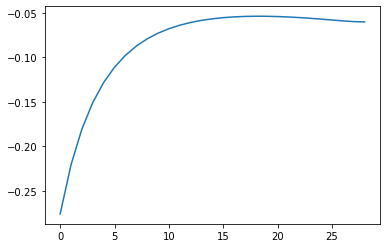

In [81]:
check = P[:,5,5]-P[:,5,6]
plt.plot(check)









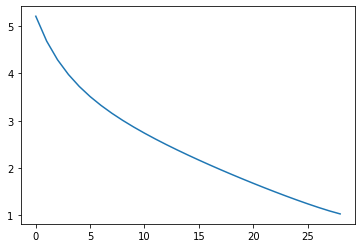

In [82]:
plt.plot(P[:,5,5])

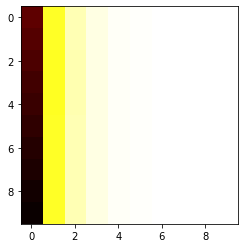

In [112]:
plt.imshow(P[0,:,:], cmap='hot', interpolation='nearest')

0


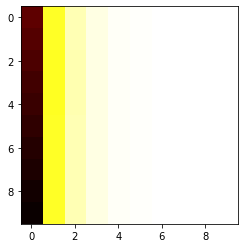

100


IndexError: index 100 is out of bounds for axis 0 with size 29

In [113]:
for tt in np.arange(0,1800,100):
    print(int(tt))
    t = int(tt)
    plt.imshow(P[t,:,:], cmap='hot', interpolation='nearest')
    plt.show()

In [ ]:
for tt in np.arange(0,180,10):
    print(int(tt))
    t = int(tt)
    plt.plot(P[t*10,:,0])
    plt.plot(Data_Specified_Head_values[0,:,t])

    plt.show()

In [37]:
loc

'./files/BC_IC_files/Run_1613750605'